In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from mpl_toolkits.mplot3d import Axes3D

# Perceptron no PyTorch

Na biblioteca PyTorch, o Perceptron recebe dois parâmetros:
- in_features: Dimensão da entrada;
- out_features: Dimensão da saída;

In [23]:
torch.manual_seed(42)

perceptron = nn.Linear(in_features=3, out_features=1)

Podemos pegar as inforções como pesos e viés, cada perceptron é iniciado com valores aleatórios nesses campos:

In [24]:
for nome, tensor in perceptron.named_parameters():
    print(nome, tensor.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])


Como sabemos, o Perceptron é um classificador Linear, então plotando em um gráfico 3D, obtemos um plano:

In [25]:
#w1, w2, w3 = perceptron.weight.data.numpy()
#b = perceptron.bias.data.numpy()

# w1*x1 + w2*x2 + w3*x3 + b = 0

def plot3d(perceptron):

    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()

    x1 = np.linspace(-1, 1, 10) # gera 10 pontos aleatorios entre -1 e 1
    x2 = np.linspace(-1, 1, 10)

    x1, x2 = np.meshgrid(x1, x2)

    x3 = (b - w1*x1 - w2*x2) / w3 # dimensao Z

    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    #ax.view_init(azim=180)
    ax.plot_surface(x1, x2, x3, cmap='plasma')

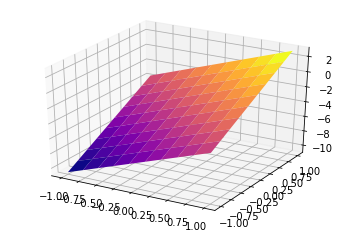

In [26]:
plot3d(perceptron)

Dado um ponto x ao perceptron, ele retornará a transformação linear desse ponto de acordo com os pesos e viés:

tensor([0.7391], grad_fn=<AddBackward0>)


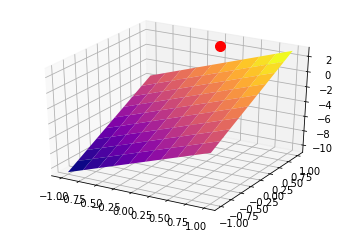

In [31]:
X = torch.Tensor([0, 1, 2])
y = perceptron(X) # Transformação linear do ponto X

print(y) # 0.7391
plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color = 'r', marker = 'o', markersize=10)

# Função de Ativação

São funções que definem se a decisão da NN. Uma função muito usada é a **Sigmoidal**, onde existem valores variando entre 0 e 1, dando peso a decisão, diferente de um limiar de ativação binário, onde existe apenas 0 e 1.

Por exemplo, ao classificar um ponto utilizando um limiar binário, existe apenas a certeza de ser da classe 1 ou ser da classe 0. Quando é utilizada uma função como a sigmoidal, existe a incerteza, que seria um valor intermediário de 0 e 1, quanto mais próximo de 1, mais certeza da classe e vice-versa.

Outras funções populares:
 - Tanh: Similar à sigmoidal, mas com valores variando entre -1 e 1;
 - ReLU: Valores negativos são zerados, enquanto valores positivos se comportam de forma linear.